<div style="text-align: center; margin: 50px">

<h1 style="color: darkblue; background-color: white; text-align: center;">Qubit by Qubit - Semester 2</h1>
<h3>Quantum Teleporation Lab 20</h3>
</div>

Quantum Mechanics allows to do some super cool things! One of those is quantum teleportation. This phenomenon ties into the no-cloning theorem, another interesting part of quantum mechanics!

First let's clarify what is being teleported - we are transfering a quantum state rather than an object of any kind. Without measuring $|\Psi \rangle$ we can transfer $|\Psi \rangle$ from Alice to Bob without copying (cloning) the state $|\Psi \rangle$ at any time

In [ ]:
import qiskit as q

## Question 1: Quantum teleportation pre-requisites

A quantum register is a collection of multiple qubits. They make the creation of quantum circuits easier. Let's learn how to make them!

#### 1 a) Create a quantum register named qr with 2 qubits

In [ ]:
#Solution
qr=q.QuantumRegister(2)

#### 1 b) Create a quantum register named qr with 3 qubits, and give it a label 'q'

In [ ]:
qr=q.QuantumRegister(3,'q')

Similar to a quantum register, a classical register is a collection of multiple classical bits. 

#### 1 c) Create a classical register named cr with 2 classical bits, and give it a label 'c'

In [ ]:
cr = q.ClassicalRegister(2, 'c')

Now that we know how to create classical and quantum registers, let's make a circuit with them! 

#### 1 d) Create a quantum circuit named qc, with a quantum register named qr with 2 qubits and a classical register named cr with 1 classical bit.

In [ ]:
qr = q.QuantumRegister(2, 'q')
cr = q.ClassicalRegister(1, 'c')
qc = q.QuantumCircuit(qr, cr)
qxq1d = qc

Next, let's add a measurement

#### 1 e) In the quantum circuit qr from the previous question, measure the state of qubit 0 and record it onto the classical bit

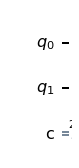

In [ ]:
qc.measure(0,0)
display(tc.draw(output="mpl"))
qxq1e = qc

The last pre-requisite we want to implement are conditional gates. 

#### 1 f) In the quantum circuit qc from the previous question, add a z gate on q1 if q0 is measured to be in state 0

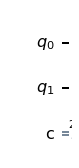

In [ ]:
qc.z(1).c_if(cr,0)
display(tc.draw(output="mpl"))
qxq1f = qc

## Question 2: How to teleport!

In order to teleport the state $|\Psi \rangle$, we must create an entagled pair of qubits and give one of the qubits to each of Alice and Bob.

Let's initialise our teleportation circuit, we will need three qubits and two classical bits:

In [ ]:
qr = q.QuantumRegister(3, 'q')
cr_0 = q.ClassicalRegister(1, 'c0')
cr_1 = q.ClassicalRegister(1, 'c1')
# For this we will need access to both the classical and quantum registers 
tc = q.QuantumCircuit(qr, cr_0, cr_1)

Now that we have our three qubits, and two classical bits, we can define the qubit $q_0$ to hold the state $|\Psi \rangle$ that we want to send and the qubit $q_1$ to belong to Alice and $q_2$ to belong to bob.

In the last homeworkd we asked you to create multiple Bell states. 

Using the circuit defined above, create an  the $|\Phi^+\rangle$ state between the $q_1$ and $q_2$ qubits, where:

$$
| \Phi^+ \rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle
$$

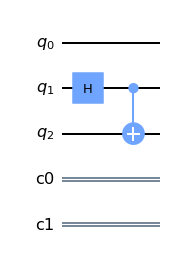

In [ ]:
# Solution
tc.h(1)
tc.cx(1,2)
display(tc.draw(output="mpl"))

# Submit solution
qxq_q1a = tc

From here, we give the $q_1$ to Alice and $q_2$ to Bob.

Alice now can apply a CNOT gate to $q_1$ controlled by the $q_0$ qubit.

Add those gates into the circuit and display the circuit

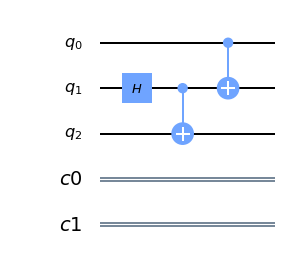

In [ ]:
# Solution
tc.cx(0,1)
display(tc.draw(output="mpl"))

# Submit solution
qxq_q1b = tc

Alice can now measure both of her qubits and record the states in the two classical bits that she has.

Add this into your circuit too!

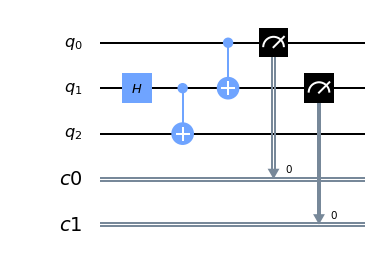

In [ ]:
# Solution
tc.measure(0,0)
tc.measure(1,1)
display(tc.draw(output="mpl"))

# Submit solution
qxq_q1c = tc

Now with only two bits of classical information, Bob can completely recreate the state of $| \Psi \rangle$ on his end!

To do this he can follow the following format:

If the first bit is 1, he applies a Z gate, if the second bit is 1 he applies an X gate.

00 = Nothing

01 = $X$ gate

10 = $Z$ gate

11 = $ZX$ gate

We can do this using some qiskit shortcuts: 

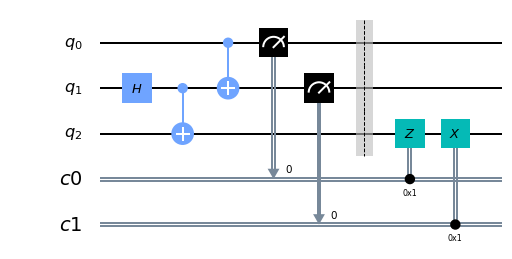

In [ ]:
tc.barrier() # Use barrier to separate steps
tc.z(2).c_if(cr_0, 1)
tc.x(2).c_if(cr_1, 1)
display(tc.draw(output="mpl"))

And now the original state $| \Psi \rangle $ which was first with Alice has now has been transfered to Bob!

Let's run a simulation on the `statevector simulator` to show that a state get's copied from qubit $q_0$ to qubit $q_2$

# Question 3: Simulating Quantum Teleportation!
Let's run a simulation on the `statevector simulator` to show that a state get's copied from qubit $q_0$ to qubit $q_2$

We can use the Qiskit `random_state` generator to make a state $| \Psi \rangle$ for Alice that we can send to Bob. The `random_state(1)` generator takes a single argument that tells it the number of qubits over which to generate a random state.